# Plastic Waste to Ocean

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
plastic_waste_path = "plastic-pollution- Mismanaged plastic waste to ocean per capita (kg per year).csv"

In [3]:
plastic_waste = pd.read_csv(plastic_waste_path)


In [4]:
mismanaged_plastic = pd.DataFrame(plastic_waste)

In [5]:
mismanaged_plastic.rename(columns={'Mismanaged plastic waste to ocean per capita (kg per year)':'Plastics to Ocean (per capita)'},
                         inplace = True)
mismanaged_plastic

,Entity,Code,Year,Plastics to Ocean (per capita)
0,Africa,NaN,2019,0.059823
1,Albania,ALB,2019,0.543214
2,Algeria,DZA,2019,0.134114
3,Angola,AGO,2019,0.027023
4,Antigua and Barbuda,ATG,2019,0.020619
...,...,...,...,...
160,Vietnam,VNM,2019,0.292561
161,Western Sahara,ESH,2019,0.065292
162,World,OWID_WRL,2019,0.126980
163,Yemen,YEM,2019,0.008641


In [6]:
mismanaged_plastic_high = mismanaged_plastic.loc[mismanaged_plastic['Plastics to Ocean (per capita)']>=0.500000,
                                  ['Entity', 'Plastics to Ocean (per capita)']]

mismanaged_plastic_high.head()

,Entity,Plastics to Ocean (per capita)
1,Albania,0.543214
13,Belize,0.958974
36,Dominica,0.736111
37,Dominican Republic,0.584412
38,East Timor,0.552978


In [7]:
sorted_high = mismanaged_plastic_high.sort_values(['Plastics to Ocean (per capita)'], ascending = True)
sorted_high

,Entity,Plastics to Ocean (per capita)
83,Liberia,0.534333
1,Albania,0.543214
38,East Timor,0.552978
37,Dominican Republic,0.584412
62,Haiti,0.615200
126,Saint Vincent and the Grenadines,0.729730
36,Dominica,0.736111
73,Jamaica,0.791723
13,Belize,0.958974
56,Grenada,1.160714


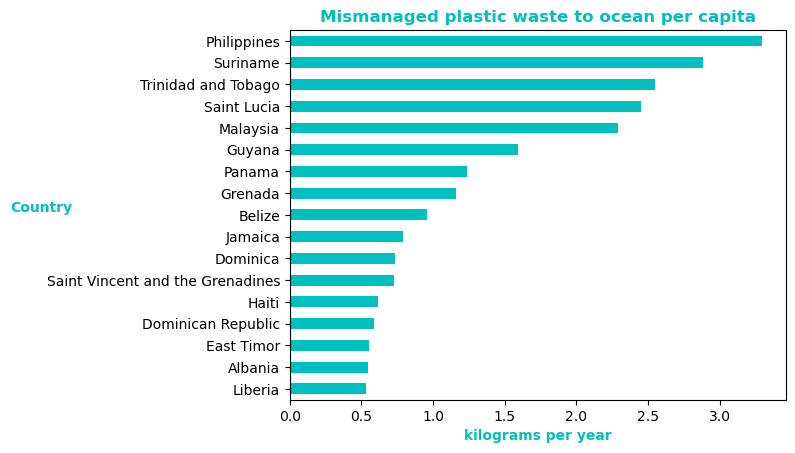

In [8]:
sorted_high.plot(x = 'Entity', y = 'Plastics to Ocean (per capita)', kind='barh', color='c', legend=False)
plt.title('Mismanaged plastic waste to ocean per capita',color= 'c', fontsize='large',fontweight='semibold')

plt.xlabel('kilograms per year',color= 'c',fontweight='semibold')
plt.ylabel('Country',rotation='horizontal',color= 'c',fontweight='semibold')

plt.show()


In [9]:
# Number of countries in study
countries = len(mismanaged_plastic['Entity'].unique())
countries

165

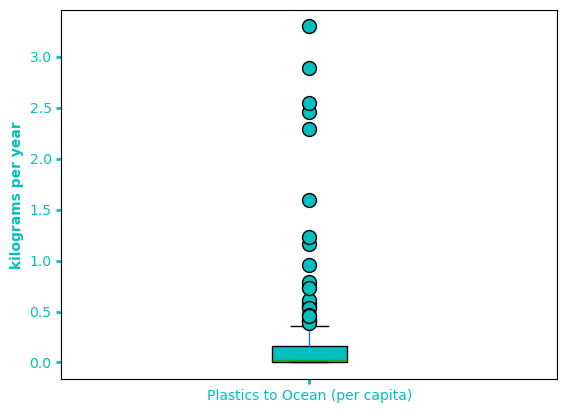

In [10]:
mismanaged_plastic.boxplot(grid = False,column='Plastics to Ocean (per capita)',
                           patch_artist= True,boxprops = dict(facecolor = 'c'),
                           flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'c'})
plt.ylabel('kilograms per year',color= 'c',fontweight='semibold')
plt.tick_params(colors='c', which='both', labelsize='medium', width=2)


# Marine Microplastics
mongoimport --type csv -d plastic_pollution -c ocean_plastics --headerline --drop MarineMicroplastics_oceanwater.csv
mongoimport --type csv -d plastic_pollution -c beach_plastics --headerline --drop MarineMicroplastics_beaches.csv

In [11]:
from pymongo import MongoClient
from pprint import pprint
import folium
from folium.plugins import HeatMap
import requests

In [12]:
microplastics_path = 'MarineMicroplastics_oceanwater.csv'

In [13]:
microplastics = pd.read_csv(microplastics_path)

In [14]:
mongo = MongoClient(port=27017)

In [15]:
[x for x in mongo.list_databases()]

[{'name': 'admin', 'sizeOnDisk': 40960, 'empty': False},
 {'name': 'autosaurus', 'sizeOnDisk': 172032, 'empty': False},
 {'name': 'classDB', 'sizeOnDisk': 73728, 'empty': False},
 {'name': 'class_DB', 'sizeOnDisk': 73728, 'empty': False},
 {'name': 'config', 'sizeOnDisk': 110592, 'empty': False},
 {'name': 'epa', 'sizeOnDisk': 1540096, 'empty': False},
 {'name': 'local', 'sizeOnDisk': 73728, 'empty': False},
 {'name': 'plastic_pollution', 'sizeOnDisk': 94208, 'empty': False},
 {'name': 'travel_db', 'sizeOnDisk': 81920, 'empty': False},
 {'name': 'uk_food', 'sizeOnDisk': 16879616, 'empty': False}]

In [16]:
plastic_ocean = mongo['plastic_pollution']

In [17]:
print(plastic_ocean.list_collection_names())

['recycled_plastic']


In [18]:
pprint(plastic_ocean.ocean_plastics.find_one())

None


In [19]:
print(plastic_ocean.list_collection_names())

['recycled_plastic']


In [20]:
pprint(plastic_ocean.beach_plastics.find_one())

None


In [21]:
microplastics.head()

,FID,Date,Latitude,Longitude,Oceans,Regions,SubRegions,Measurement,Unit,Density Range,...,Sediment Sample Depth (m),Transect Number,Sampling Point on Beach,Volunteers Number,Collecting Time (min),State,Country,Marine Setting,x,y
0,118054,2/3/2011 12:00:00 AM,-34.7158,-49.2130,Atlantic Ocean,NaN,NaN,0.186451,pieces/m3,0.005-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-5.478366e+06,-4.125326e+06
1,117983,11/24/2010 12:00:00 AM,-31.2527,-21.7331,Atlantic Ocean,NaN,NaN,0.182106,pieces/m3,0.005-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-2.419318e+06,-3.665611e+06
2,118647,10/4/2017 12:00:00 AM,-1.5000,-82.0000,Pacific Ocean,NaN,NaN,0.430000,pieces/m3,0.005-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-9.128198e+06,-1.669983e+05
3,112813,4/23/2002 12:00:00 AM,27.5500,-177.0300,Pacific Ocean,Papahanaumokuakea Marine National Monument,NaN,0.054020,pieces/m3,0.005-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-1.970689e+07,3.192357e+06
4,113406,3/31/2005 12:00:00 AM,9.5500,-155.9300,Pacific Ocean,NaN,NaN,0.005400,pieces/m3,0.005-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-1.735805e+07,1.068058e+06


In [29]:
# Create min_area and max_area
min_measurement = microplastics['Measurement'].min()
max_measurement = microplastics['Measurement'].max()

In [30]:
# Normalize the data between 0 - 1
normalized_data = []

for index, row in microplastics.iterrows():
    latitude = row['Latitude']
    longitude = row['Longitude']
    measurement = row['Measurement']

    normalized_measurement = (measurement - min_measurement) / (max_measurement - min_measurement)

    # Create a new data point and include the a parameter (normalized_area) as the intensity
    normalized_data.append([latitude, longitude, normalized_measurement])    

In [31]:
# Center the map at (0, 0)
# world_lat_lon = folium.Map(location=[0, 0], zoom_start=2)  # You can adjust the zoom level as needed
world_lat_lon = [0, 0]

#instantiate a folium map
m = folium.Map(
    world_lat_lon, 
    zoom_start=5,
    # tiles = 'https://{s}.tile.opentopomap.org/{z}/{x}/{y}.png', 
    # attr = 'Map data: &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, <a href="http://viewfinderpanoramas.org">SRTM</a> | Map style: &copy; <a href="https://opentopomap.org">OpenTopoMap</a> (<a href="https://creativecommons.org/licenses/by-sa/3.0/">CC-BY-SA</a>)'
)


In [32]:
# Create the heatmap
heat_map = HeatMap(normalized_data)
heat_map.add_to(m)

#call the map
m